### 导入数据包与数据集

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)

### 数据分析

#### 总体预览

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 数据初步分析，统计与绘图

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Sex Feature：女性生存率远高于男性

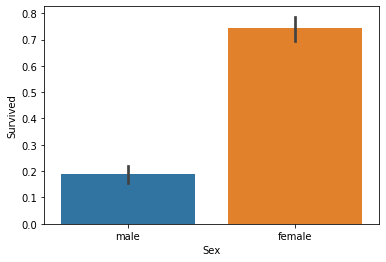

In [6]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

##### Pclass：乘客社会等级越高，生存率越高

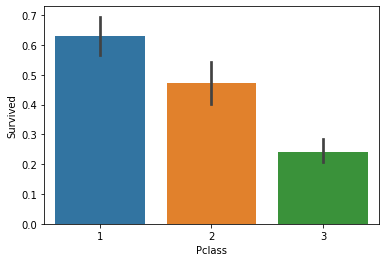

In [7]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

##### SibSp Feature：配偶及兄弟姐妹数适中的乘客幸存率更高

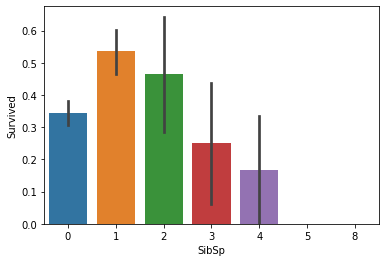

In [8]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

##### Parch Feature：父母与子女数适中的乘客幸存率更高

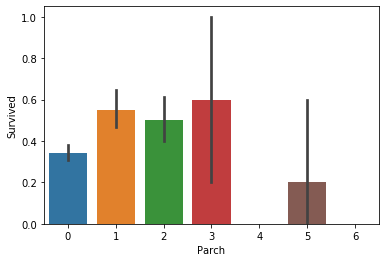

In [9]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)

##### Age Feature：年龄15岁左侧，生存率有明显差别。其他年龄段并不明显，应是随机所致。单独分离小年龄段。

Text(12.359751157407416, 0.5, 'density')

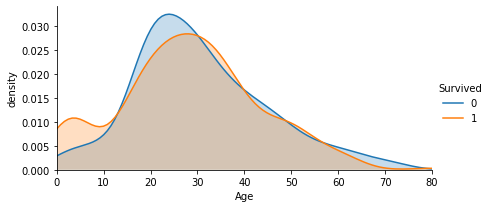

In [10]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 2)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(Xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

##### Embarked Feature：登陆港口C的生存率高，应保留为模型特征

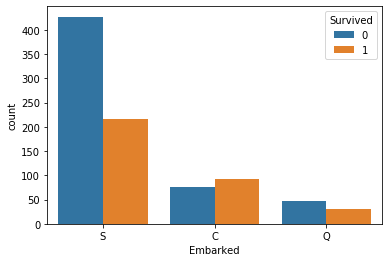

In [11]:
sns.countplot('Embarked', hue = 'Survived', data = train)

##### Title Feature(new)：不同称呼的乘客幸存率不同

In [12]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master', 'Jonkheer'], 'Master'))

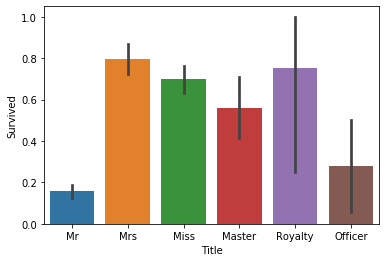

In [13]:
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x = 'Title', y = 'Survived', data = all_data)

##### FamilyLabel Feature(New)：家庭人数2到4幸存率较高。并根据人数分为三类

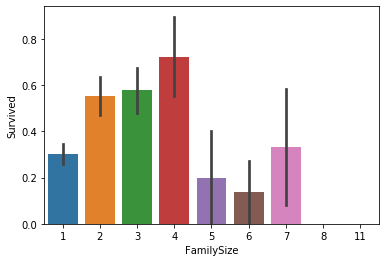

In [14]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x = 'FamilySize', y = 'Survived', data = all_data)

根据人数分为三类

In [15]:
def family_label(s):
    if s >= 2 and s <= 4:
        return 2
    elif (s > 4 and s <= 7) or s == 1:
        return 1
    elif s > 7:
        return 0

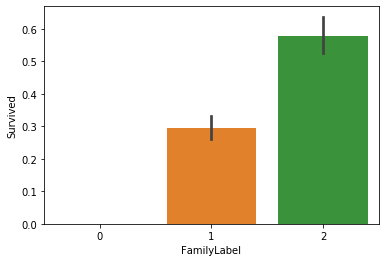

In [16]:
all_data['FamilyLabel'] = all_data['FamilySize'].apply(family_label)
sns.barplot(x = 'FamilyLabel', y = 'Survived', data = all_data)

##### Deck Feature(New)：不同甲板的乘客幸存率不同。先填充，再提取Cabin首字母构成甲板

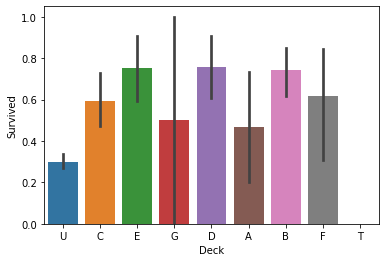

In [17]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x = 'Deck', y = 'Survived', data = all_data)

##### TicketGroup Feature(New)：与2-4人共票号的乘客幸存率较高

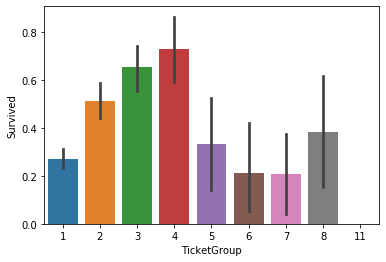

In [18]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x : Ticket_Count[x])
sns.barplot(x = 'TicketGroup', y = 'Survived', data = all_data)

根据生存率把TicketGroup分为三类

In [19]:
def ticket_label(s):
    if s >= 2 and s <= 4:
        return 2
    elif (s > 4 and s <= 8) or s == 1:
        return 1
    elif s > 8:
        return 0

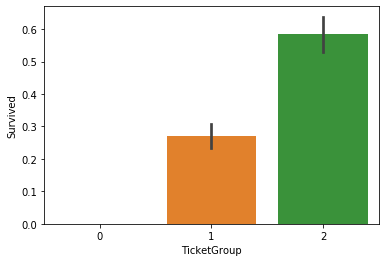

In [20]:
all_data['TicketGroup'] = all_data['TicketGroup'].apply(ticket_label)
sns.barplot(x = 'TicketGroup', y = 'Survived', data = all_data)

### 数据清洗

#### 缺失值填充

##### Age feature：Age缺失值较大，用Sex，Title，Pclass 三个特征构建随机森林模型填充

In [21]:
all_data[all_data['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
5,NaN,Unknown,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,1,1,U,1
17,NaN,Unknown,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373,Mr,1,1,U,1
19,NaN,Unknown,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649,Mrs,1,1,U,1
26,NaN,Unknown,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631,Mr,1,1,U,1
28,NaN,Unknown,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959,Miss,1,1,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,Unknown,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915,Miss,1,1,U,1
1301,NaN,Unknown,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237,Miss,1,1,U,1
1304,NaN,Unknown,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,1,1,U,1
1307,NaN,Unknown,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,1,1,U,1


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
age_df = all_data[['Age', 'Pclass', 'Sex', 'Title']]
age_df = pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[(all_data.Age.isnull()), 'Age'] = predictedAges

In [24]:
all_data[all_data['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup


##### Embarked Feature：缺失量为2，根据 Pclass，Embarked，Fare 定为 C

In [25]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


In [26]:
all_data.groupby(by = ['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [27]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

##### Fare Feature：Fare缺失量为1，根据Embarked，Pclass求票价平均值

In [28]:
fare = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

#### 同组识别

##### 把形势相同的乘客分为同一组，在提取妇女儿童和成年男性

In [29]:
all_data['Surname'] = all_data['Name'].apply(lambda x : x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x : Surname_Count[x])
Female_Child_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & ((all_data['Age'] <= 12) | (all_data['Sex'] == 'female'))]
Male_Adult_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & (all_data['Age'] > 12) & (all_data['Sex'] == 'male')]

##### 绝大部分妇女儿童，同组的要么全部幸存，要么全部遇难

In [30]:
Female_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns = ['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

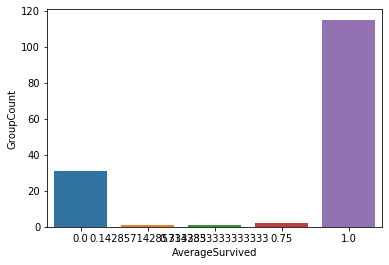

In [31]:
sns.barplot(x = Female_Child.index, y = Female_Child['GroupCount']).set_xlabel('AverageSurvived')

##### 成年男性也同样如此

In [32]:
Male_Adult = pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


##### 因为普遍是妇女儿童生存率高，成年男性生存率低。所以我们把反常的姓氏提取出来

In [33]:
Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List = set(Female_Child_Group[Female_Child_Group.apply(lambda x : x == 0)].index)
print(Dead_List)
Male_Adult_List = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List = set(Male_Adult_List[Male_Adult_List.apply(lambda x : x == 1)].index)
print(Survived_List)

{'Lahtinen', 'Attalah', 'Ford', 'Strom', 'Oreskovic', 'Boulos', 'Vander Planke', 'Jussila', 'Caram', 'Cacic', 'Arnold-Franchi', 'Palsson', 'Turpin', 'Danbom', 'Robins', 'Zabour', 'Goodwin', 'Ilmakangas', 'Lobb', 'Bourke', 'Sage', 'Barbara', 'Olsson', 'Van Impe', 'Canavan', 'Rosblom', 'Johnston', 'Panula', 'Lefebre', 'Rice', 'Skoog'}
{'Kimball', 'McCoy', 'Jussila', 'Goldenberg', 'Daly', 'Cardeza', 'Frolicher-Stehli', 'Beckwith', 'Frauenthal', 'Taylor', 'Nakid', 'Harder', 'Duff Gordon', 'Bishop', 'Jonsson', 'Bradley', 'Chambers', 'Greenfield', 'Dick', 'Beane'}


##### 使反常组中的Age，Title，Sex进行惩罚修改

In [34]:
train = all_data.loc[all_data['Survived'].notnull()]
test = all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)), 'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)), 'Age'] = 60
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)), 'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)), 'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)), 'Age'] = 5
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)), 'Title'] = 'Miss'

#### 特征转换

##### 选取特征，转换为数值变量，划分训练集和测试集

In [35]:
all_data = pd.concat([train, test])
all_data = all_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel', 'Deck', 'TicketGroup']]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived', axis = 1)
X = train.as_matrix()[:, 1:]
y = train.as_matrix()[:, 0]

### 建模与优化

#### 参数优化：网格化搜索自动选取最优参数

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

In [37]:
# pipe = Pipeline([('select', SelectKBest(k = 20)), 
#                 ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])
# param_test = {'classify__n_estimators' : list(range(20, 50, 2)),
#              'classify__max_depth' : list(range(3, 60, 3))}
# gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring = 'roc_auc', cv = 10)
# gsearch.fit(X, y)
# print(gsearch.best_params_, gsearch.best_score_)

#### 训练模型

In [38]:
from sklearn.pipeline import make_pipeline

In [39]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True,
                            n_estimators = 20,
                            max_depth = 6,
                            max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x000001FCD97F8E58>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=20, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, war

#### 交叉验证

In [54]:
from sklearn import metrics

In [55]:
from sklearn import model_selection

In [56]:
cv_score = model_selection.cross_val_score(pipeline, X, y, cv = 10)
print("CV Score : Mean - %.7g | Std - %7g" % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8372534 | Std - 0.0356513


### 预测

In [57]:
predictions = pipeline.predict(test)
submission = pd.DataFrame({'PassengerId' : PassengerId, 'Survived' : predictions.astype(np.int32)})
submission.to_csv(r"submission1.csv", index = False)